In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.animation as anim

In [2]:
def readRho(fname):
  f1 = open(fname,'r')
  lines = f1.readlines()
  f1.close()
  rho_t = []
  for line in lines:
    rho_s = line.split()
    rhor = []
    for rho in rho_s:
      rhor.append(float(rho))
    rho_t.append(rhor)
  return np.array(rho_t)

def convertRho(rho):
  U=np.zeros((16,16))
  dic=[1,2,3,5,9,6,4,7,10,13,11,8,12,14,15,16]
  for (i,j) in enumerate(dic):
    U[i,j-1]=1
  return U @ rho.reshape(16,16).T @ U.T


In [13]:
rho_r_t = readRho('rho_real.txt')
rho_i_t = readRho('rho_imag.txt')

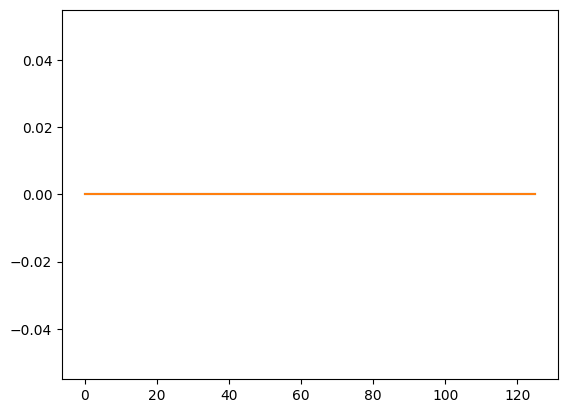

In [22]:
Nt = rho_r_t.shape[0]
plt.plot(np.arange(Nt)*0.5,rho_r_t[:,0])
plt.plot(np.arange(Nt)*0.5,rho_r_t[:,1])
plt.savefig('S0b_w2.0Da0.5_Delta1_alpha1.0_g0.1.png',dpi=300)
plt.show()

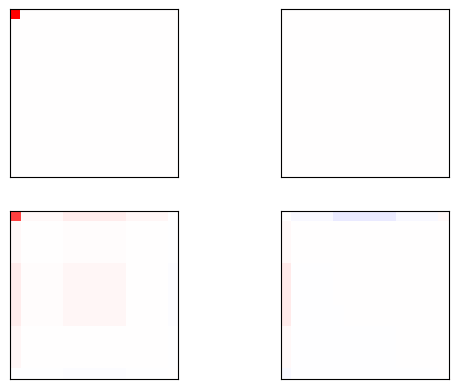

In [5]:
fig,ax = plt.subplots(2,2)
ax[0,0].matshow(convertRho(rho_r_t[0]),cmap='bwr',vmax=1,vmin=-1)
ax[0,1].matshow(convertRho(rho_i_t[0]),cmap='bwr',vmax=1,vmin=-1)
ax[1,0].matshow(convertRho(rho_r_t[-1]),cmap='bwr',vmax=1,vmin=-1)
ax[1,1].matshow(convertRho(rho_i_t[-1]),cmap='bwr',vmax=1,vmin=-1)

for i in range(2):
  for j in range(2):
    ax[i,j].xaxis.set_ticks([])
    ax[i,j].yaxis.set_ticks([])
    ax[i,j].set_aspect("equal")
plt.show()

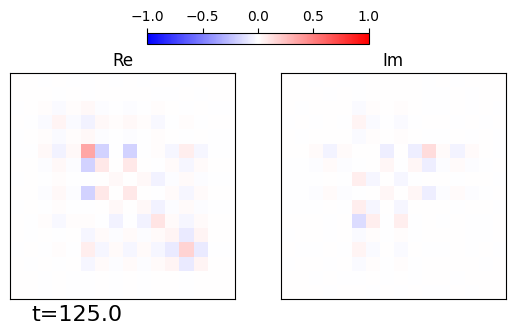

In [14]:
fig,ax = plt.subplots(1,2)
scr = ax[0].matshow(convertRho(rho_r_t[0]),cmap='bwr',vmax=1,vmin=-1)
sci = ax[1].matshow(convertRho(rho_i_t[0]),cmap='bwr',vmax=1,vmin=-1)
Nt = rho_r_t.shape[0]
for i in range(2):
  ax[i].xaxis.set_ticks([])
  ax[i].yaxis.set_ticks([])
  ax[i].set_aspect("equal")
ax[0].set_title('Re')
ax[1].set_title('Im')
cbar = fig.colorbar(scr,ax=ax,fraction=0.03,pad=0.08,
                    orientation='horizontal',location='top')
cbar.ax.xaxis.set_ticks([-1,-0.5,0,0.5,1])
title = ax[0].text(1,17,'t=0', fontsize=16)
def update(i):
    scr.set_data(convertRho(rho_r_t[i]))
    sci.set_data(convertRho(rho_i_t[i]))
    title.set_text(f"t={i*0.5:.1f}")
    return scr,sci,title

interval=100 # milli seconds

myanim = anim.FuncAnimation(fig, update, frames=Nt, interval=interval, blit=True)
myanim.save("w1.0_DaSwoff0.5_gpsuperGsin1_2.0_1.mp4", bitrate=-1, dpi=300,
            extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"],
            savefig_kwargs={"bbox_inches":"tight","pad_inches":0.01})